In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [0]:
%tensorflow_version 2.x

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.datasets import mnist

In [0]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Reshape,Flatten,Conv2D,MaxPool2D, Conv2DTranspose,BatchNormalization

In [0]:
encoder = Sequential()
encoder.add(Conv2D(32,(3,3),activation='relu',input_shape=[28,28,1]))
encoder.add(MaxPool2D((2,2)))
encoder.add(Conv2D(64,(3,3),activation='relu'))
encoder.add(MaxPool2D((2,2)))
encoder.add(Conv2D(64,(3,3),activation='relu'))

encoder.add(Flatten(input_shape=[3,3,64]))
encoder.add(Dense(49,activation='relu'))
encoder.add(Dense(36,activation='relu'))

In [0]:
encoder.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_6 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 49)              

In [0]:
decoder = Sequential()
decoder.add(Dense(49,activation='relu',input_shape=[36]))
decoder.add(Reshape([7,7,1]))
decoder.add(Conv2DTranspose(64,(3,3),strides=2,activation='relu',padding='same'))
decoder.add(BatchNormalization())
decoder.add(Conv2DTranspose(64,(3,3),strides=2,activation='relu',padding='same'))
decoder.add(BatchNormalization())
decoder.add(Conv2DTranspose(32,(3,3),activation='relu',padding='same'))
decoder.add(Conv2D(1,(3,3),padding='same',activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [0]:
decoder.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 49)                1813      
_________________________________________________________________
reshape_7 (Reshape)          (None, 7, 7, 1)           0         
_________________________________________________________________
conv2d_transpose_10 (Conv2DT (None, 14, 14, 64)        640       
_________________________________________________________________
batch_normalization_7 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_transpose_11 (Conv2DT (None, 28, 28, 64)        36928     
_________________________________________________________________
batch_normalization_8 (Batch (None, 28, 28, 64)        256       
_________________________________________________________________
conv2d_transpose_12 (Conv2DT (None, 28, 28, 32)      

In [0]:
autoencoders = Sequential([encoder,decoder])
autoencoders.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
autoencoders.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_26 (Sequential)   (None, 36)                85817     
_________________________________________________________________
sequential_27 (Sequential)   (None, 28, 28)            58646     
Total params: 144,463
Trainable params: 144,207
Non-trainable params: 256
_________________________________________________________________


In [0]:
autoencoders.fit(X_train,X_train,epochs=5,validation_data=(X_test,X_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 13s 217us/sample - loss: 0.1493 - accuracy: 0.8031 - val_loss: 0.1217 - val_accuracy: 0.8078
Epoch 2/5
60000/60000 [==============================] - 12s 204us/sample - loss: 0.1159 - accuracy: 0.8090 - val_loss: 0.1100 - val_accuracy: 0.8099
Epoch 3/5
60000/60000 [==============================] - 12s 202us/sample - loss: 0.1090 - accuracy: 0.8102 - val_loss: 0.1051 - val_accuracy: 0.8105
Epoch 4/5
60000/60000 [==============================] - 12s 203us/sample - loss: 0.1057 - accuracy: 0.8109 - val_loss: 0.1042 - val_accuracy: 0.8105
Epoch 5/5
60000/60000 [==============================] - 12s 202us/sample - loss: 0.1035 - accuracy: 0.8112 - val_loss: 0.1041 - val_accuracy: 0.8106


In [0]:
passed_image = autoencoders.predict(X_test[:10])

Generated image after passing through the autoencoder


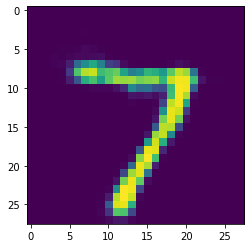

In [0]:
print("Generated image after passing through the autoencoder")
plt.imshow(passed_image[0])

Orignal Image 


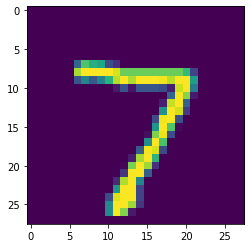

In [0]:
print("Orignal Image ")
plt.imshow(X_test[0].reshape(28,28))